In [1]:
import numpy as np
import copy
import sympy as sp
import math
x = sp.Symbol('x', real=True)

In [2]:
def LagrangeInterpolation(x,y,a):
    n = len(x)
    c_lst = []
    term_details =[]
    result = 0
    for i in range(n):
        numerator = 1
        denominator = 1
        c_lst_tmp = []
        for j in range(n):
            if(i!=j):
                c_lst_tmp.append(x[j])
                numerator = numerator*(a-x[j])
                denominator = denominator*(x[i]-x[j])
        
        c_lst.append(c_lst_tmp)

        result += (numerator/denominator)*(y[i])
        term_details.append([(i+1),numerator,denominator,y[i]])
    
    return result, term_details,c_lst

In [3]:
def finding_polynomial(x,y,term_details,c_lst):
    x = sp.Symbol('x',real=True)
    
    denominators = []
    for term in term_details:
        denominators.append(term[2])

    l_terms = []
    final_equation = 0
    m = len(c_lst)
    
    for i in range(m):
        l_term = 1
        for element in c_lst[i]:
            l_term *=(x-element)
        
        l_term = sp.expand(l_term/denominators[i])
        l_terms.append(sp.expand(l_term))
        final_equation += l_term*(y[i])
    
    l_terms_lambdified = []
    for l_term in l_terms:
        l_terms_lambdified.append(sp.lambdify(x,l_term))

    return l_terms,l_terms_lambdified, final_equation

In [4]:
def print_lmultipliers(lmultipliers,x):
    for multiplier in lmultipliers:
        print()
        print(f'Term = {multiplier[0]}')
        print(f'Numerator = {multiplier[1]}')
        print(f'Denominator = {multiplier[2]}')
        print(f'f({x[multiplier[0]-1]}) = {multiplier[3]}')
        print()


In [5]:
y = sp.Symbol('y', real=True)
X = np.array([2,2.5,4])
Y = np.array([0.5,0.4,0.25])

X = np.array([0,0.5,1,2])
Y = np.array([0,y,3,2])

X = np.array([ 0.9,  1.3,  1.9,  2.1,  2.6,  3. ,  3.9,  4.4,  4.7,  5. ,  6. ,
        7. ,  8. ,  9.2, 10.5, 11.3, 11.6, 12. , 12.6, 13. , 13.3])
Y = np.array([1.3 , 1.5 , 1.85, 2.1 , 2.6 , 2.7 , 2.4 , 2.15, 2.05, 2.1 , 2.25,
       2.3 , 2.25, 1.95, 1.4 , 0.9 , 0.7 , 0.6 , 0.5 , 0.4 , 0.25])
    
p = x

result, terms,lst_for_coefficient_calculations_of_numerator_equations_in_each_term = LagrangeInterpolation(X,Y,p)

# f(p) or result

In [6]:
print(f'f({p}) = {result}')

f(x) = 1.21516834638346e-13*(x - 13.3)*(x - 13.0)*(x - 12.6)*(x - 12.0)*(x - 11.6)*(x - 11.3)*(x - 10.5)*(x - 9.2)*(x - 8.0)*(x - 7.0)*(x - 6.0)*(x - 5.0)*(x - 4.7)*(x - 4.4)*(x - 3.9)*(x - 3.0)*(x - 2.6)*(x - 2.1)*(x - 1.9)*(x - 1.3) - 1.52845650689591e-12*(x - 13.3)*(x - 13.0)*(x - 12.6)*(x - 12.0)*(x - 11.6)*(x - 11.3)*(x - 10.5)*(x - 9.2)*(x - 8.0)*(x - 7.0)*(x - 6.0)*(x - 5.0)*(x - 4.7)*(x - 4.4)*(x - 3.9)*(x - 3.0)*(x - 2.6)*(x - 2.1)*(x - 1.9)*(x - 0.9) + 4.62032237778308e-11*(x - 13.3)*(x - 13.0)*(x - 12.6)*(x - 12.0)*(x - 11.6)*(x - 11.3)*(x - 10.5)*(x - 9.2)*(x - 8.0)*(x - 7.0)*(x - 6.0)*(x - 5.0)*(x - 4.7)*(x - 4.4)*(x - 3.9)*(x - 3.0)*(x - 2.6)*(x - 2.1)*(x - 1.3)*(x - 0.9) - 1.04400621699923e-10*(x - 13.3)*(x - 13.0)*(x - 12.6)*(x - 12.0)*(x - 11.6)*(x - 11.3)*(x - 10.5)*(x - 9.2)*(x - 8.0)*(x - 7.0)*(x - 6.0)*(x - 5.0)*(x - 4.7)*(x - 4.4)*(x - 3.9)*(x - 3.0)*(x - 2.6)*(x - 1.9)*(x - 1.3)*(x - 0.9) + 2.06539695270932e-10*(x - 13.3)*(x - 13.0)*(x - 12.6)*(x - 12.0)*(x - 11.

# Finding Polynomial

In [7]:
l_equations, l_equations_lambdified, polynomial = finding_polynomial(X,Y,terms,lst_for_coefficient_calculations_of_numerator_equations_in_each_term)

In [8]:
l_equations

[9.34744881833432e-14*x**20 - 1.34042416054914e-11*x**19 + 8.97431735640405e-10*x**18 - 3.72708831987867e-8*x**17 + 1.07599522298088e-6*x**16 - 2.29344875001253e-5*x**15 + 0.000374168186296257*x**14 - 0.00478042568013851*x**13 + 0.0485328633961767*x**12 - 0.39504218868737*x**11 + 2.58974548868677*x**10 - 13.6845148812719*x**9 + 58.1278369065086*x**8 - 197.20994026321*x**7 + 528.649372064991*x**6 - 1101.34283661709*x**5 + 1739.5397761334*x**4 - 2005.38428852461*x**3 + 1585.58022317415*x**2 - 765.702898970717*x + 169.624551862404,
 -1.01897100459727e-12*x**20 + 1.4571285365741e-10*x**19 - 9.7250388884563e-9*x**18 + 4.02454245104276e-7*x**17 - 1.15719608926339e-5*x**16 + 0.000245523214897439*x**15 - 0.00398465887328149*x**14 + 0.0506025975176426*x**13 - 0.510176815778321*x**12 + 4.11930243324022*x**11 - 26.7516185488695*x**10 + 139.80648761494*x**9 - 586.164750233732*x**8 + 1958.07275128926*x**7 - 5152.16160276604*x**6 + 10494.5489378425*x**5 - 16125.1377739951*x**4 + 17964.6800877466*x**

In [9]:
polynomial

-3.074530780108e-11*x**20 + 4.27948927144617e-9*x**19 - 2.772830850466e-7*x**18 + 1.1107589542363e-5*x**17 - 0.000308159189308439*x**16 + 0.00628589966751671*x**15 - 0.0976903800730416*x**14 + 1.18284031649903*x**13 - 11.3160515558665*x**12 + 86.2513979924877*x**11 - 525.81275350666*x**10 + 2564.20130819595*x**9 - 9968.9788573308*x**8 + 30677.6349740652*x**7 - 73866.5656784617*x**6 + 136777.900226631*x**5 - 189850.972861703*x**4 + 189994.993238064*x**3 - 128683.405779068*x**2 + 52462.580328702*x - 9652.78507912501

In [10]:
# predicting value usin polynomial

x = sp.Symbol('x', real = True)
f = sp.lambdify(x,polynomial)
f(p)

-3.074530780108e-11*x**20 + 4.27948927144617e-9*x**19 - 2.772830850466e-7*x**18 + 1.1107589542363e-5*x**17 - 0.000308159189308439*x**16 + 0.00628589966751671*x**15 - 0.0976903800730416*x**14 + 1.18284031649903*x**13 - 11.3160515558665*x**12 + 86.2513979924877*x**11 - 525.81275350666*x**10 + 2564.20130819595*x**9 - 9968.9788573308*x**8 + 30677.6349740652*x**7 - 73866.5656784617*x**6 + 136777.900226631*x**5 - 189850.972861703*x**4 + 189994.993238064*x**3 - 128683.405779068*x**2 + 52462.580328702*x - 9652.78507912501

In [11]:
Y_approx = []
for a in X:
    Y_approx.append(f(a))

In [12]:
Y_approx

[1.299999998511339,
 1.4999999923165888,
 1.8499999537161784,
 2.09999991946097,
 2.5999996613682015,
 2.699998952317401,
 2.3999894572334597,
 2.1499684300943045,
 2.0499425099842483,
 2.0998970087530324,
 2.2494231317105005,
 2.2974079953419277,
 2.239809942795546,
 1.9041678726352984,
 1.1919506545673357,
 0.42531205115665216,
 0.031668098250520416,
 -0.39454988348006736,
 -1.2276260512153385,
 -2.080073383214767,
 -3.0766870737279532]

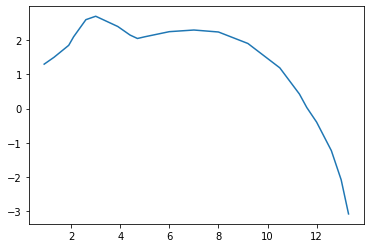

In [13]:
import matplotlib.pyplot as plt
plt.plot(X,Y_approx)

# Finding numerator equations for each term

numerator_equation_lst

for i in range(len(l_equations_lambdified)):
    f = l_equations_lambdified[i]
    print(f'Term = {i+1}    L{i} = {f(p)}\n')

## The above terms should match with numerator term in the below cells output

# printing details of each term used in calculation

print_lmultipliers(terms,X)